###   Лабараторная работа 6

####  Вариант 3


In [1]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
import matplotlib.pyplot as plt
import random
import math


%matplotlib inline


In [2]:
class Player:
    def __init__(self, id, x, y, hp):
        self.id = id
        self.x = x
        self.y = y
        self.hp =hp
        
    def X(self):
        return self.x
    
    def Y(self):
        return self.y
    
    def ID(self):
        return self.id
    
    def HP(self):
        return self.hp
    
    def Decrease_HP(self, value):
        self.hp = min(self.hp - value, 0)

In [ ]:
random.seed(a=2, version=2)

In [57]:
size = 100
count_players = 100
A = [i - size for i in range(size*2 +1 )]
X = random.choices(A, k=count_players)
Y = random.choices(A, k=count_players)
players = [ Player(i, X[i], Y[i], 100) for i in range(count_players)]
    
    

angle = random.random() * math.pi * 2
cos = math.cos(angle) * size
sin = math.sin(angle) * size

In [48]:
count_box = 3
X_box = random.choices(A, k=count_box*2)
Y_box = random.choices(A, k=count_box*2)
boxes = [] # каждая коробка - 4 отрезка сторон
boxes_for_drawing = []
for i in range(count_box):
    box = [[[X_box[2*i], Y_box[2*i]], [X_box[2*i], Y_box[2*i+1]]]]
    box.append([[X_box[2*i], Y_box[2*i+1]], [X_box[2*i+1], Y_box[2*i+1]]])
    box.append([[X_box[2*i+1], Y_box[2*i+1]], [X_box[2*i+1], Y_box[2*i]]])
    box.append([[X_box[2*i+1], Y_box[2*i]], [X_box[2*i], Y_box[2*i]]])
    
    box_x = [X_box[2*i], X_box[2*i+1], X_box[2*i+1], X_box[2*i], X_box[2*i]]
    box_y = [Y_box[2*i], Y_box[2*i], Y_box[2*i+1], Y_box[2*i+1], Y_box[2*i]]
    
    boxes.append(box)
    boxes_for_drawing.append([box_x, box_y])
    


In [62]:
me = random.randrange(0, count_players)

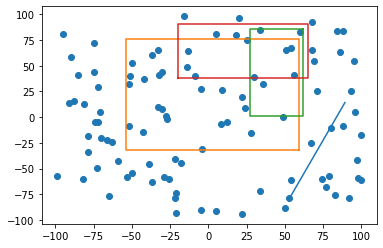

In [63]:
scatter(X,Y)
plt.plot([players[me].X(), cos + players[me].X()], [players[me].Y(), sin + players[me].Y()])
for box in boxes_for_drawing:
    plt.plot(box[0], box[1])

In [64]:
def hit(player, players, angle):
    cos_angle = math.cos(angle)
    sin_angle = math.sin(angle)
    print('cos: ', cos_angle, 'sin: ', sin_angle)
    dist_square = 1000000
    hited_enemy = None
    test = [-1,-1]
    for enemy in players:
        if (enemy.ID() == player.ID()):
            continue
        x = enemy.X() - player.X()
        y = enemy.Y() - player.Y()
        
        dist_to = x*x+y*y
        scal_prod = cos_angle*x + sin_angle*y
        prod = abs(scal_prod) * scal_prod/ dist_to -1
        
        #print('prod: ', prod)
        if prod > -0.01:
            if dist_square > dist_to:
                dist_square = dist_to
                print('prod: ', prod)
                print('pos ', [ enemy.X(), enemy.Y()], '; dist: ', dist_square)
                hited_enemy = enemy
    return dist_square, enemy

hit(players[me], players, angle)

cos:  0.363170664352414 sin:  0.9317226349905997
prod:  -2.020331868923808e-05
pos  [93, 25] ; dist:  12416
prod:  -0.00843629619432995
pos  [88, -9] ; dist:  6125
prod:  -3.968509472396242e-05
pos  [80, -11] ; dist:  5353


(5353, <__main__.Player at 0x2052390caf0>)

In [52]:
def cross(vec1, vec2):
    return vec1[0]*vec2[1] - vec1[1]*vec2[0]

def is_cross(cut1, cut2):

    vec1 = [cut1[1][0] - cut1[0][0], cut1[1][1] - cut1[0][1]] # AB
    vec2 = [cut2[1][0] - cut2[0][0], cut2[1][1] - cut2[0][1]] # CD
    
    AC = [cut2[0][0] - cut1[0][0], cut2[0][1] - cut1[0][1]]
    AD = [cut2[1][0] - cut1[0][0], cut2[1][1] - cut1[0][1]]
    CA = [-AC[0], - AC[1]]
    CB = [cut1[1][0] - cut2[0][0], cut1[1][1] - cut2[0][1]]

    
    prod1 = cross(vec2, CA)
    prod2 = cross(vec2, CB)

    if (cross(vec1, AC) * cross(vec1, AD) >= 0) or (prod1 * prod2 >= 0):
        return None
    
    px = cut1[0][0] + vec1[0] * abs(prod1/(prod2-prod1))
    py = cut1[0][1] + vec1[1] * abs(prod1/(prod2-prod1))
    return px, py
    
#is_cross([[0,0],[4,4]], [[0,4],[1, 3]])

In [67]:
shot = [[players[me].X(),players[me].Y()], [cos*10+players[me].X(), sin*10+players[me].Y()]]

def wall_shot(shot, box):
    dist_hit = None # максимальное число
    for cut in box:
        print(shot)
        print(cut)
        point = is_cross(shot, cut)
        if point is not None:
            dist = (shot[0][0]-point[0])*2+(shot[0][1]-point[1])*2
            if (dist_hit is None) or (dist_hit > dist):
                dist_hit = dist
                
    return dist_hit
    

def nearest_wall_shot(shot, boxes):
    dist_hit = None # максимальное число
    for box in boxes:
        dist = wall_shot(shot, box)
        if (dist_hit is None) or (dist_hit > dist):
            dist_hit = dist
    return dist_hit

print(shot)
print(boxes[0])
wall_shot(shot, boxes[0])

[[53, -79], [416.170664352414, 852.7226349905997]]
[[[59, -32], [59, 76]], [[59, 76], [-54, 76]], [[-54, 76], [-54, -32]], [[-54, -32], [59, -32]]]
[[53, -79], [416.170664352414, 852.7226349905997]]
[[59, -32], [59, 76]]
[[53, -79], [416.170664352414, 852.7226349905997]]
[[59, 76], [-54, 76]]
[[53, -79], [416.170664352414, 852.7226349905997]]
[[-54, 76], [-54, -32]]
[[53, -79], [416.170664352414, 852.7226349905997]]
[[-54, -32], [59, -32]]
